# Content

### 1. Introduction
### 2. Data Review
### 3. Data Preprocessing
#### $\;\;\;\;\;\;$3.1. Data Preparing
#### $\;\;\;\;\;\;$3.2. Data Cleaning
### 4. Data Exploration
### 5. Building Models

## 1. Introduction

**Problem Statement:** A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

**Goal of the case study** You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## 2. Data Review

HR Analytics Dataset which used in this case study has taken from Kaggle. We had three different data frame related to the same case at the beginning. Then have merged all of them in best way. At the starting of the project, we are going to have clear and only one data frame to study. We have 29 variables and 4410 observations on dataset. 

*see for datasets: https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study*

#### Variables and Explanations

In [1]:
import pandas as pd

In [2]:
dictionary = pd.read_csv('data_dictionary.csv').dropna()
dictionary

,Variable,Meaning
0,Age,Age of the employee
1,Attrition,Whether the employee left in the previous year...
2,BusinessTravel,How frequently the employees travelled for bus...
3,Department,Department in company
4,DistanceFromHome,Distance from home in kms
5,Education,Education Level
10,EducationField,Field of education
11,EmployeeCount,Employee count
12,EmployeeNumber,Employee number/id
13,EnvironmentSatisfaction,Work Environment Satisfaction Level


## 3. Data Preprocessing

**In this chapter**, we have combined **'general_data', 'employee_survey_data'** and **'manager_survey_data'**. All are including important informations collected by human resource department of the company. 

### 3.1. Preparing the Data

In [3]:
import pandas as pd

In [4]:
general = pd.read_csv('general_data.csv')
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
general.shape

(4410, 24)

In [6]:
employee = pd.read_csv('employee_survey_data.csv')
employee.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
employee.shape

(4410, 4)

In [8]:
manager = pd.read_csv('manager_survey_data.csv')
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [9]:
manager.shape

(4410, 3)

In [10]:
data = pd.merge(general, manager, on = 'EmployeeID')
df = pd.merge(data, employee, on = 'EmployeeID')

In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

#### Dropping useless columns

In [12]:
df = df.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'], axis = 1)

#### Current dataframe

In [13]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


## 3.2. Data Cleaning

#### Missing Data

Here, we see that we are facing a small amount of missing values. Then we have filled them with the most frequent values of the columns.

In [14]:
fill_list = []
for i in range(len(df.columns)):
    if df.isnull().sum()[i]>0:
        fill_list.append(df.columns[i])

In [15]:
print('Data types of missing values \n','--'*10)
for item in fill_list:
    print(item, ', type:', type(df[item][5]))
    print('--'*20)

Data types of missing values 
 --------------------
NumCompaniesWorked , type: <class 'numpy.float64'>
----------------------------------------
TotalWorkingYears , type: <class 'numpy.float64'>
----------------------------------------
EnvironmentSatisfaction , type: <class 'numpy.float64'>
----------------------------------------
JobSatisfaction , type: <class 'numpy.float64'>
----------------------------------------
WorkLifeBalance , type: <class 'numpy.float64'>
----------------------------------------


In [16]:
pers = ((df[fill_list].isnull().sum()/4410)*100)

print('Missing Value Percentage \n','--'*10)
for item in fill_list:
    print(item, round(pers[item],2),'%')

Missing Value Percentage 
 --------------------
NumCompaniesWorked 0.43 %
TotalWorkingYears 0.2 %
EnvironmentSatisfaction 0.57 %
JobSatisfaction 0.45 %
WorkLifeBalance 0.86 %


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Right filling method seems here, filling with mostly repeated one. By the way, we have too little amount of missing data, so it does not matter what method we used for filling.

In [18]:
for i in range(0,5):
    
    df[fill_list[i]] = df[fill_list[i]].fillna(df[fill_list[i]].mode()[0]) 

In [19]:
print('Number of Missing Values at the end of process:\n','--'*20)
print(df[fill_list].isnull().sum())

Number of Missing Values at the end of process:
 ----------------------------------------
NumCompaniesWorked         0
TotalWorkingYears          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


## 4. Data Exploration

Our purose here, mostly, understanding which and how variables are related to 'Attrition'. Who wants to leave the company and why? So we made it 'Attrition' oriented.

In [20]:
import numpy as np

In [21]:
df_young = df[(df['Age'] <= 21) & (df['Age'] >= 18)]
df_young_yes = df_young[df_young['Attrition']=='Yes']
df_rest = df[df['Age']>21]

### Attrition

Attrition means the employees who quit, fired, resign their job. If it is 'yes', the employee is no more working at the company.

In [22]:
print('Total Attrition Number is', df.Attrition.value_counts()[1])

Total Attrition Number is 711


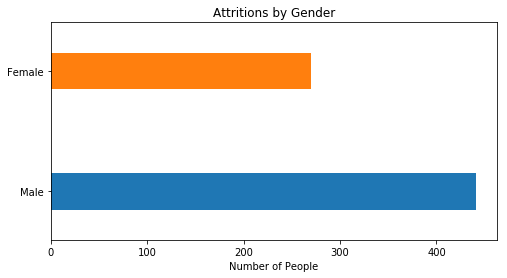

In [23]:
plt.figure(figsize = (8,4))
df[df['Attrition']=='Yes']['Gender'].value_counts().plot(kind = 'barh', width = 0.3)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Number of People')
plt.title('Attritions by Gender')
plt.show()

In [24]:
attrition_per = (df[df['Attrition']=='Yes'].shape[0]/df.shape[0])*100

print('Ratio of employees who left the job:', round(attrition_per,2),'%')

Ratio of employees who left the job: 16.12 %


### Gender

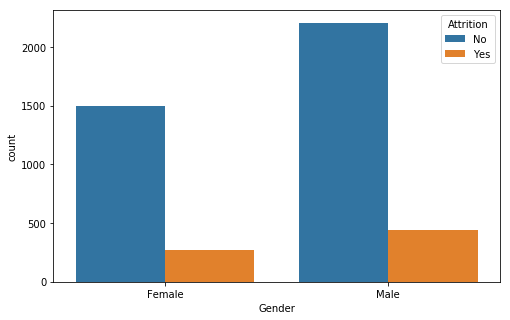

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Gender', hue = 'Attrition', data = df)
plt.show()

In [26]:
gen_count = df['Gender'].value_counts()
gen_per = (gen_count/4410)*100
gen_yes = df[df['Attrition']=='Yes']['Gender'].value_counts()

print('Male Percentage of Observations:', gen_per[0],'%')
print('Female Percentage of Observations:', gen_per[1],'%')
print('--'*20)
print('Male Left Job Percentage:',round((gen_yes[0]/gen_count[0])*100,2), '%')
print('Female Left Job Percentage:',round((gen_yes[1]/gen_count[1])*100,2), '%')

Male Percentage of Observations: 60.0 %
Female Percentage of Observations: 40.0 %
----------------------------------------
Male Left Job Percentage: 16.67 %
Female Left Job Percentage: 15.31 %


***Ratio of males and females who left the job is approximately same. We can see here, gender is not an indicator itself. Our initial hypotesis here is that, it is not about genders.***

### Age

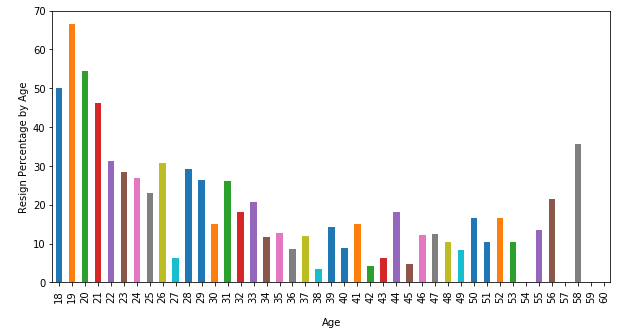

In [27]:
age_per = (df[df['Attrition']=='Yes']['Age'
                                     ].value_counts().sort_index(ascending = True))/(df['Age'
                                                                                      ].value_counts().sort_index(ascending 
                                                                                                                  = True))*100
plt.figure(figsize = (10,5))
age_per.plot(kind = 'bar')
plt.xlabel('\nAge')
plt.ylabel('\nResign Percentage by Age')
plt.show()

***Between 18 and 21 years old employees resign ratio is seriously high.***

### Age - Gender

In [28]:
female_age = df[df['Gender']=='Female']['Age']
male_age = df[df['Gender']=='Male']['Age']

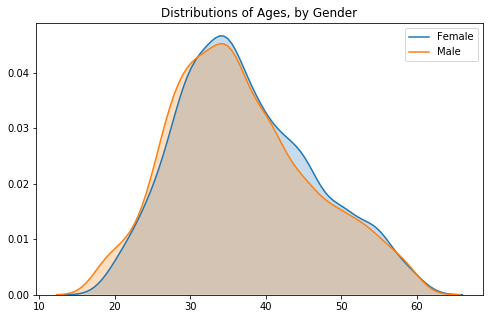

In [29]:
plt.figure(figsize = (8,5))
sns.kdeplot(data=female_age, label="Female", shade=True)
sns.kdeplot(data=male_age, label="Male", shade=True)

plt.title("Distributions of Ages, by Gender")
plt.legend()
plt.show()

***Age distribution is balanced between genders.***

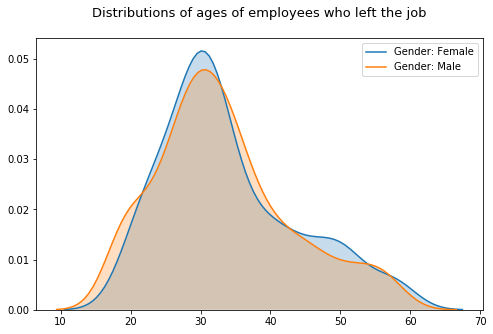

In [30]:
fem_age_yes = df[(df['Gender']=='Female') & (df['Attrition']=='Yes')]['Age']
male_age_yes = df[(df['Gender']=='Male') & (df['Attrition']=='Yes')]['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=fem_age_yes, label="Gender: Female", shade=True)
sns.kdeplot(data=male_age_yes, label="Gender: Male", shade=True)

plt.title("Distributions of ages of employees who left the job\n", size = 13)
plt.legend()
plt.show()

***We do not see any correlations between age and genders of employees who left the job.***

###  Bussiness Travel

In [31]:
print('There are three type of travel frequency:','Travel_Rarely,', 'Travel_Frequently,', 'Non-Travel')

There are three type of travel frequency: Travel_Rarely, Travel_Frequently, Non-Travel


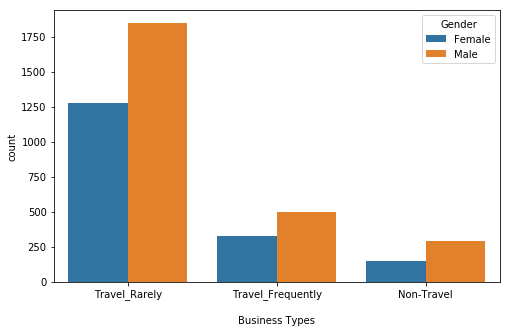

In [32]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'BusinessTravel', hue = 'Gender', data = df)
plt.xlabel('\nBusiness Types')
plt.show()

In [33]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [34]:
df[df['Attrition']=='Yes']['BusinessTravel'].value_counts()

Travel_Rarely        468
Travel_Frequently    207
Non-Travel            36
Name: BusinessTravel, dtype: int64

In [35]:
print('Travel Types Percentages:','\n', '--'*20)
print('Travel Rarely per.:', round((3129/4410)*100,2), '%')
print('Travel Frequently per.:', round((831/4410)*100,2), '%')
print('Non Travel per.:', round((450/4410)*100,2), '%\n')

print('Resign Ratios by Travel Frequency:','\n', '--'*20)
print('Travel Rarely per.:', round((468/3129)*100,2), '%')
print('Travel Frequently per.:', round((207/831)*100,2), '%')
print('Non Travel per.:', round((36/450)*100,2), '%\n')

Travel Types Percentages: 
 ----------------------------------------
Travel Rarely per.: 70.95 %
Travel Frequently per.: 18.84 %
Non Travel per.: 10.2 %

Resign Ratios by Travel Frequency: 
 ----------------------------------------
Travel Rarely per.: 14.96 %
Travel Frequently per.: 24.91 %
Non Travel per.: 8.0 %



***Here, we have seen something remarkable, the biggest resign ratio belongs to frequently traveling employees.***

###  Departments

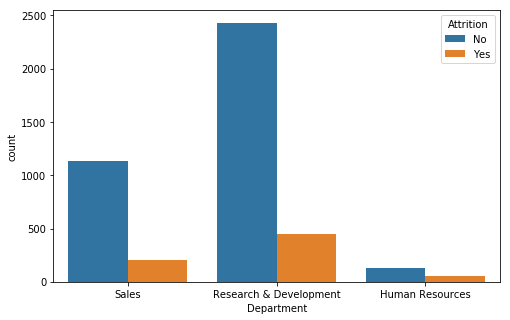

In [36]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Department', hue = 'Attrition', data = df)
plt.show()

In [37]:
print('Resign Ratios by Departments', '\n','--'*20)
print(round(df[df['Attrition']=='Yes']['Department'].value_counts() / df['Department'].value_counts()*100,2),2)

Resign Ratios by Departments 
 ----------------------------------------
Research & Development    15.71
Sales                     15.02
Human Resources           30.16
Name: Department, dtype: float64 2


In [38]:
df_young_yes = df_young[df_young['Attrition']=='Yes']

print('Number of Young Employees of Depts.:\n', df_young['Department'].value_counts())
print('--'*20)
print('Number of Resigned Young Employees of Depts.:\n', df_young_yes['Department'].value_counts())
print('--'*20)
print('Resign Percentage of Young Employees by Departments:\n',round(df_young_yes['Department'].value_counts()/
                                                                  df_young['Department'].value_counts()*100,0))

Number of Young Employees of Depts.:
 Research & Development    90
Sales                     30
Human Resources            3
Name: Department, dtype: int64
----------------------------------------
Number of Resigned Young Employees of Depts.:
 Research & Development    51
Sales                     12
Human Resources            3
Name: Department, dtype: int64
----------------------------------------
Resign Percentage of Young Employees by Departments:
 Research & Development     57.0
Sales                      40.0
Human Resources           100.0
Name: Department, dtype: float64


***Human Resources Department has the highest resign ratio. R&D and Sales Department is nearly same. For younger employees, human resources dept. does not seem beautiful place to work. But only 3 young employee worked as we know. So it may not be the best result can be achieved from this information. By the way, HR dept. employees are really low paid related to others. This can be an important reason of job quits from human resources department.***

###  Distance From Home

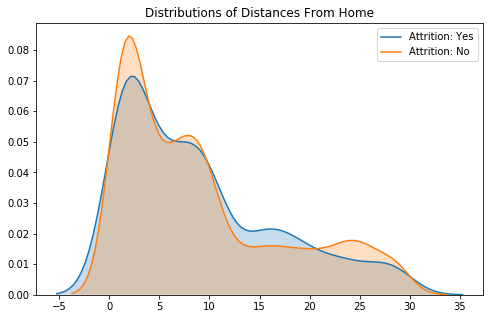

In [39]:
dist_yes = df[df['Attrition']=='Yes']['DistanceFromHome']
dist_no = df[df['Attrition']=='No']['DistanceFromHome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=dist_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=dist_no, label="Attrition: No", shade=True)

plt.title("Distributions of Distances From Home")
plt.legend()
plt.show()

***Here, no correlation seen between the attritions and distances from home.***

###  Education Levels
1: 'Below College'
2: 'College'
3: 'Bachelor'
4: 'Master'
5: 'Doctor'

In [40]:
df['Education_str'] = df['Education'].replace({1:'Below College', 2:'College',
                                              3:'Bachelor', 4:'Master', 5:'Doctor'})

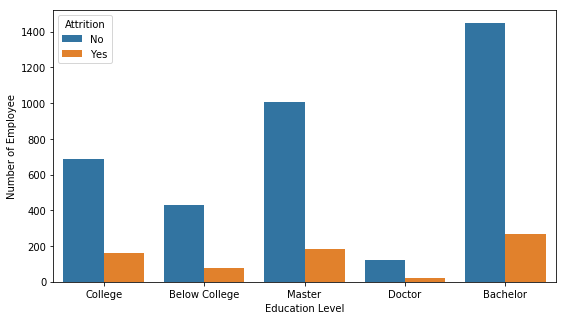

In [41]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'Education_str', hue = 'Attrition', data=df)
plt.xlabel('Education Level')
plt.ylabel('Number of Employee')
plt.show()

In [42]:
edu_lev_per = df[df['Attrition']=='Yes']['Education_str'].value_counts()/df['Education_str'].value_counts()*100

In [43]:
print('Resing Ratios (%) by Education Level\n', '--'*20,'\n', round(edu_lev_per,2))

Resing Ratios (%) by Education Level
 ---------------------------------------- 
 Bachelor         15.56
Master           15.58
College          18.79
Below College    15.29
Doctor           14.58
Name: Education_str, dtype: float64


***For all education levels, resign ratios are nearly same, only college ratio is slightly different but not too much.***

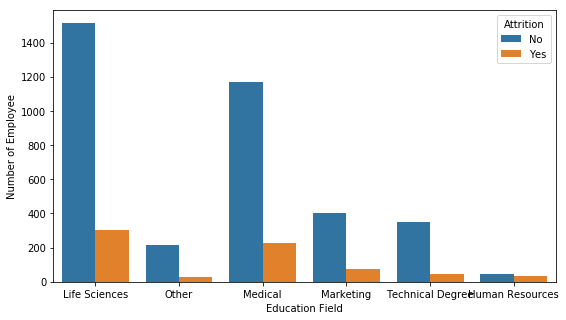

In [44]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'EducationField', hue = 'Attrition', data=df)
plt.xlabel('Education Field')
plt.ylabel('Number of Employee')
plt.show()

In [45]:
edu_field_per = df[df['Attrition']=='Yes']['EducationField'].value_counts()/df['EducationField'].value_counts()*100

In [46]:
print('Resing Ratios (%) by Education Field\n', '--'*20,'\n', round(edu_field_per),2)

Resing Ratios (%) by Education Field
 ---------------------------------------- 
 Human Resources     41.0
Life Sciences       17.0
Marketing           16.0
Medical             16.0
Other               12.0
Technical Degree    11.0
Name: EducationField, dtype: float64 2


***Human resources has the highest ratio again. There should be a problem!***

###  Job Level

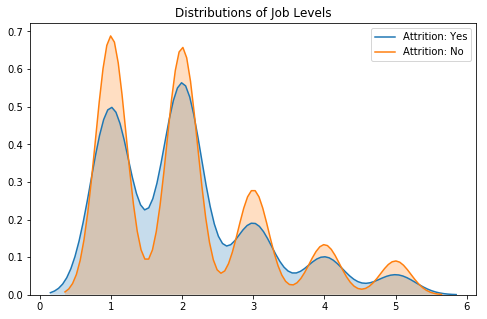

In [47]:
job_level_yes = df[df['Attrition']=='Yes']['JobLevel']
job_level_no = df[df['Attrition']=='No']['JobLevel']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_level_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_level_no, label="Attrition: No", shade=True)

plt.title("Distributions of Job Levels")
plt.legend()
plt.show()

In [48]:
job_lev_per = (df[df['Attrition']=='Yes']['JobLevel'].value_counts()/df.JobLevel.value_counts())*100
print('Resign Ratios (%) by Job Level\n', '--'*20,'\n', round(job_lev_per),2)

Resign Ratios (%) by Job Level
 ---------------------------------------- 
 1    15.0
2    18.0
3    15.0
4    16.0
5    13.0
Name: JobLevel, dtype: float64 2


***Second Level seems has a bit higher resign ratio than others.***

###  Job Role

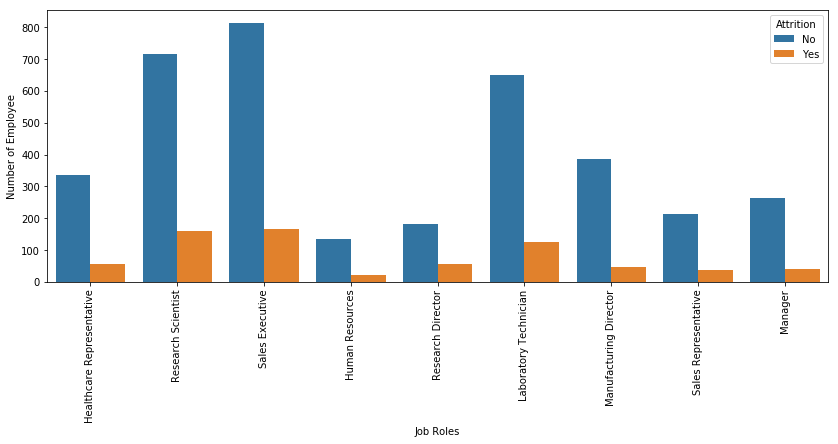

In [49]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'JobRole', hue = 'Attrition', data=df)
plt.xlabel('Job Roles')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Employee')
plt.show()

In [50]:
job_role_per = (df[df['Attrition']=='Yes']['JobRole'].value_counts()/df.JobRole.value_counts())*100
print('Resign Ratios (%) by Job Role\n', '--'*20,'\n',round(job_role_per),2)


Resign Ratios (%) by Job Role
 ---------------------------------------- 
 Healthcare Representative    15.0
Human Resources              13.0
Laboratory Technician        16.0
Manager                      14.0
Manufacturing Director       11.0
Research Director            24.0
Research Scientist           18.0
Sales Executive              17.0
Sales Representative         14.0
Name: JobRole, dtype: float64 2


***The highest resign ratio here is belonged to research director role.***

### Marital Status

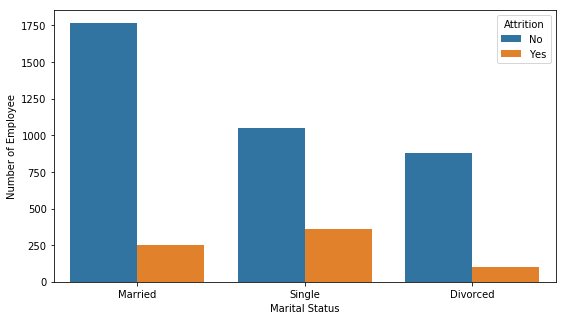

In [51]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Number of Employee')
plt.show()

In [52]:
marital_per = (df[df['Attrition']=='Yes']['MaritalStatus'].value_counts()/df.MaritalStatus.value_counts())*100
print('Resign Ratios (%) by Marital Status\n', '--'*20,'\n', round(marital_per,2))

Resign Ratios (%) by Marital Status
 ---------------------------------------- 
 Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64


***Single employees are more likely to leave job than others.***

### Monthly Income

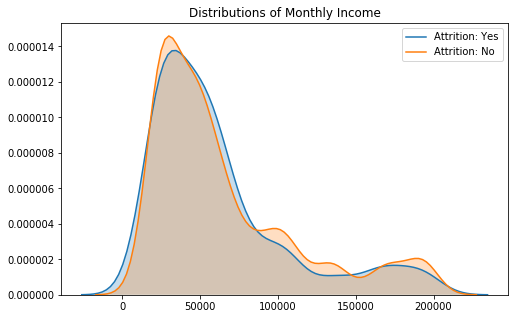

In [53]:
income_yes = df[df['Attrition']=='Yes']['MonthlyIncome']
income_no = df[df['Attrition']=='No']['MonthlyIncome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=income_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=income_no, label="Attrition: No", shade=True)

plt.title("Distributions of Monthly Income")
plt.legend()
plt.show()

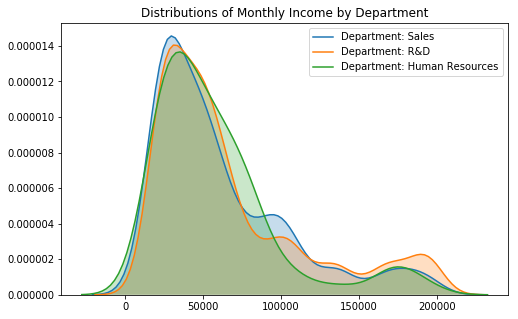

In [54]:
income_sales = df[df['Department']=='Sales']['MonthlyIncome']
income_RD = df[df['Department']=='Research & Development']['MonthlyIncome']
income_HR = df[df['Department']=='Human Resources']['MonthlyIncome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=income_sales, label="Department: Sales", shade=True)
sns.kdeplot(data=income_RD, label="Department: R&D", shade=True)
sns.kdeplot(data=income_HR, label="Department: Human Resources", shade=True)

plt.title("Distributions of Monthly Income by Department")
plt.legend()
plt.show()

### Average Salaries by Deparment

In [55]:
print('Sales Dep. Average:',round(income_sales.mean()))
print('R&D Dep. Average:',round(income_RD.mean()))
print('Human Resources Dep. Average:',round(income_HR.mean()))

Sales Dep. Average: 61384.0
R&D Dep. Average: 67188.0
Human Resources Dep. Average: 57904.0


***Human Resources Department has lowest average salary.***

###  Number of Companies Worked

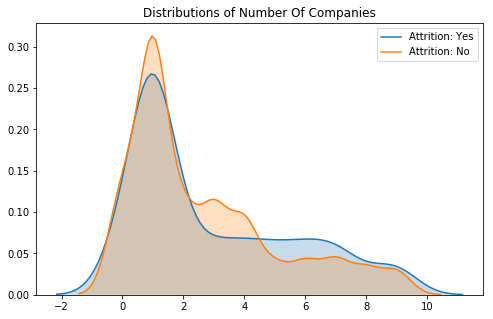

In [56]:
num_com_yes = df[df['Attrition']=='Yes']['NumCompaniesWorked']
num_com_no = df[df['Attrition']=='No']['NumCompaniesWorked']

plt.figure(figsize = (8,5))
sns.kdeplot(data=num_com_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=num_com_no, label="Attrition: No", shade=True)

plt.title("Distributions of Number Of Companies")
plt.legend()
plt.show()

In [57]:
print('Num. Company Worked and Mean Age:\n','--'*20,)
for i in range(0,9):
    print('Num. Company:',i, 'Mean Age:', round(df[df['NumCompaniesWorked']==i]['Age'].mean(),2))

Num. Company Worked and Mean Age:
 ----------------------------------------
Num. Company: 0 Mean Age: 34.23
Num. Company: 1 Mean Age: 32.49
Num. Company: 2 Mean Age: 41.16
Num. Company: 3 Mean Age: 41.23
Num. Company: 4 Mean Age: 41.57
Num. Company: 5 Mean Age: 38.92
Num. Company: 6 Mean Age: 38.99
Num. Company: 7 Mean Age: 40.88
Num. Company: 8 Mean Age: 41.04


In [58]:
num_com_per = (df[df['Attrition']=='Yes']['NumCompaniesWorked'].value_counts()/df.NumCompaniesWorked.value_counts())*100
print('Resign Ratios (%) by Number of Companies Worked\n', '--'*20,'\n',round(num_com_per,2))

Resign Ratios (%) by Number of Companies Worked
 ---------------------------------------- 
 0.0    11.77
1.0    18.83
2.0    10.96
3.0    10.13
4.0    12.05
5.0    24.60
6.0    23.08
7.0    22.97
8.0    12.24
9.0    23.08
Name: NumCompaniesWorked, dtype: float64


***We can say that, frequently job changing employees have higher resign ratio.***

### Income Equality

In [59]:
group_salary = df['MonthlyIncome'].groupby(df['Gender'])
print('Average of Salaries by Gender:\n', '--'*10, '\n' ,group_salary.mean(), '\n')

group_hike = df['PercentSalaryHike'].groupby(df['Gender'])
print('Average of Hikes by Gender:\n', '--'*10, '\n' ,group_hike.mean())

Average of Salaries by Gender:
 -------------------- 
 Gender
Female    64595.255102
Male      65318.684807
Name: MonthlyIncome, dtype: float64 

Average of Hikes by Gender:
 -------------------- 
 Gender
Female    15.156463
Male      15.244898
Name: PercentSalaryHike, dtype: float64


***Average salaries and average hikes are nearly same, there is no income inequality between genders.***

In [60]:
print('Average Salary of Sales Dep. Young Employees', df_young[df_young['Department']=='Sales']['MonthlyIncome'].mean())
print('Average Salary of R&D Dep. Young Employees', df_young[df_young['Department']=='Research & Development']['MonthlyIncome'].mean())
print('Average Salary of Human Res. Dep. Young Employees', df_young[df_young['Department']=='Human Resources']['MonthlyIncome'].mean())

Average Salary of Sales Dep. Young Employees 73772.0
Average Salary of R&D Dep. Young Employees 80874.0
Average Salary of Human Res. Dep. Young Employees 53730.0


***I think we should not seek for an income equality between deparments and there is not obviously. But employees might think different from me. So it can explain a bit more why human resources employees are leaving?***

### Total Working Years

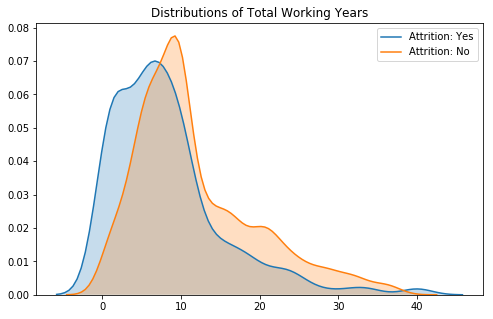

In [61]:
work_year_yes = df[df['Attrition']=='Yes']['TotalWorkingYears']
work_year_no = df[df['Attrition']=='No']['TotalWorkingYears']

plt.figure(figsize = (8,5))
sns.kdeplot(data=work_year_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=work_year_no, label="Attrition: No", shade=True)

plt.title("Distributions of Total Working Years")
plt.legend()
plt.show()

***The employees with the less total working years are more likely to leave the job.***

In [62]:
work_year_per = (df[df['Attrition']=='Yes']['TotalWorkingYears'].value_counts()/df.TotalWorkingYears.value_counts())*100
work_year_per = work_year_per[0:34].interpolate()

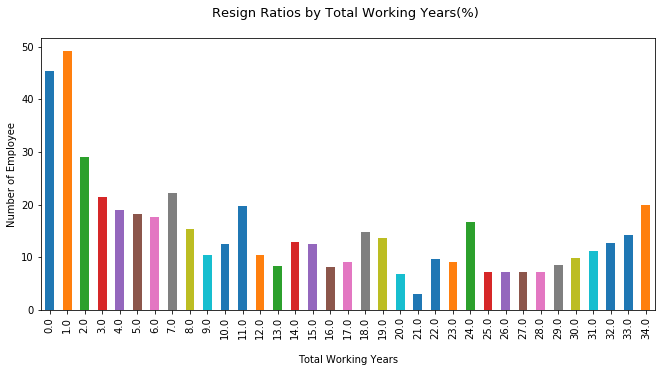

In [63]:
plt.figure(figsize = (11,5))
work_year_per.plot(kind = 'bar')
plt.xlabel('\nTotal Working Years')
plt.ylabel('Number of Employee')
plt.title('Resign Ratios by Total Working Years(%) \n', size = 13)
plt.show()

***What we see here is, more working experienced employees are more stable on their job. But the most important conclusion from here is, unexperienced or less experienced employees are going away probably.***

### Training Times Last Year

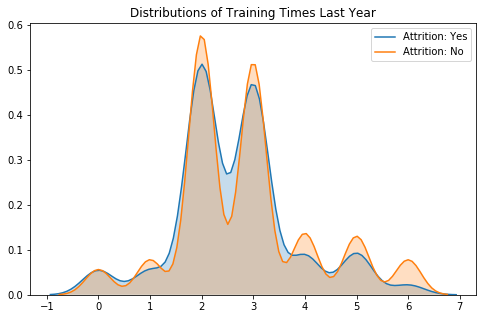

In [64]:
training_yes = df[df['Attrition']=='Yes']['TrainingTimesLastYear']
training_no = df[df['Attrition']=='No']['TrainingTimesLastYear']

plt.figure(figsize = (8,5))
sns.kdeplot(data=training_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=training_no, label="Attrition: No", shade=True)

plt.title("Distributions of Training Times Last Year")
plt.legend()
plt.show()

In [65]:
print('Training Times Per Employees Left the Job:',round(training_yes.mean(),2),'\n','--'*20)
print('Training Times Per Employees Still Working:',round(training_no.mean(),2))

Training Times Per Employees Left the Job: 2.65 
 ----------------------------------------
Training Times Per Employees Still Working: 2.83


***Training times of employees left the job is a bit less, not too much.***

### Years at Company

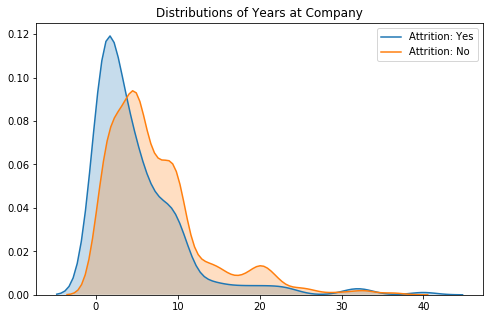

In [66]:
years_yes = df[df['Attrition']=='Yes']['YearsAtCompany']
years_no = df[df['Attrition']=='No']['YearsAtCompany']

plt.figure(figsize = (8,5))
sns.kdeplot(data=years_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=years_no, label="Attrition: No", shade=True)

plt.title("Distributions of Years at Company")
plt.legend()
plt.show()

In [67]:
years_per = (years_yes.value_counts()/years_no.value_counts())*100
years_per = years_per[0:23].interpolate()

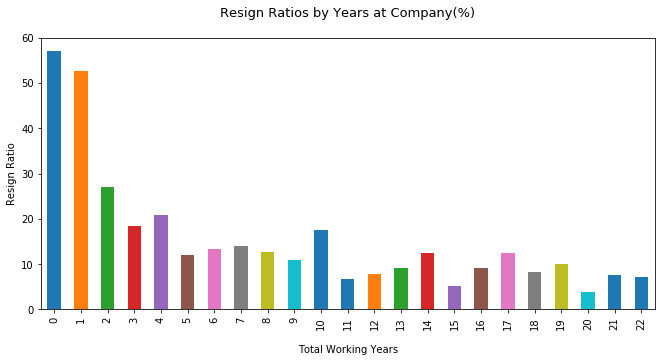

In [68]:
plt.figure(figsize = (11,5))
years_per.plot(kind = 'bar')
plt.xlabel('\nTotal Working Years')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Years at Company(%)\n', size = 13)
plt.show()

***Clearly seen, the employees has one or zero year at company is more likely to leave the job.***

### Years Since Last Promotion

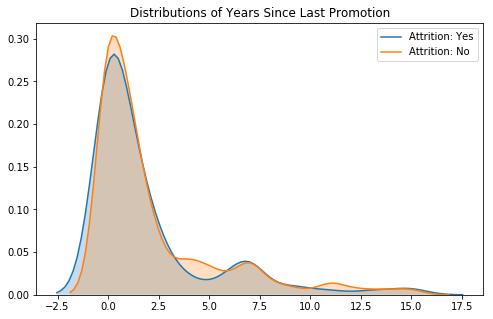

In [69]:
prom_yes = df[df['Attrition']=='Yes']['YearsSinceLastPromotion']
prom_no = df[df['Attrition']=='No']['YearsSinceLastPromotion']

plt.figure(figsize = (8,5))
sns.kdeplot(data=prom_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=prom_no, label="Attrition: No", shade=True)

plt.title("Distributions of Years Since Last Promotion")
plt.legend()
plt.show()

***The dataset doesn't present good information about this relationship. Because the most employees has 0 year since last promotion, becaues they have never been promoted before.***

### Years with current manager

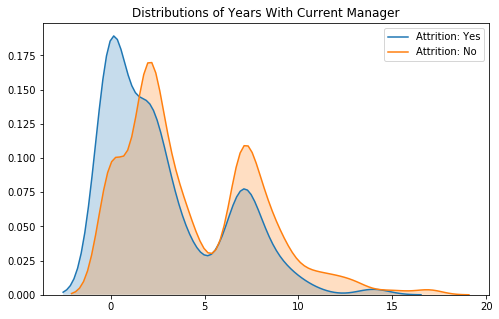

In [70]:
manager_yes = df[df['Attrition']=='Yes']['YearsWithCurrManager']
manager_no = df[df['Attrition']=='No']['YearsWithCurrManager']

plt.figure(figsize = (8,5))
sns.kdeplot(data=manager_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=manager_no, label="Attrition: No", shade=True)

plt.title("Distributions of Years With Current Manager")
plt.legend()
plt.show()

***Same idea comes up at here, the young, new and unexperinced employees has the highest resign ratio.***

###  Job Involvement

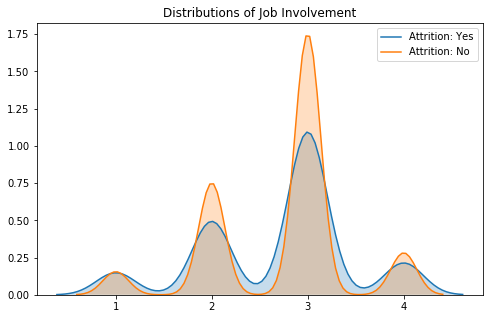

In [71]:
job_yes = df[df['Attrition']=='Yes']['JobInvolvement']
job_no = df[df['Attrition']=='No']['JobInvolvement']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_no, label="Attrition: No", shade=True)

plt.title("Distributions of Job Involvement")
plt.legend()
plt.show()

***Here, we can see that, the third job can not be quitted easily.***

In [72]:
job_per = (job_yes.value_counts()/job_no.value_counts())*100

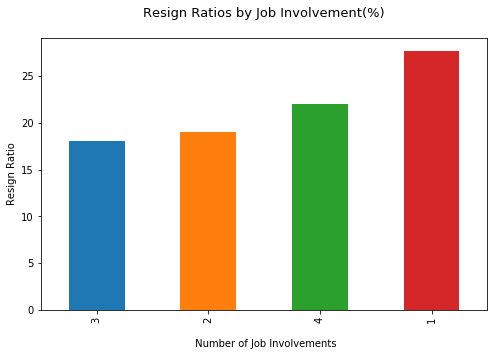

In [73]:
plt.figure(figsize = (8,5))
job_per.plot(kind = 'bar')
plt.xlabel('\n Number of Job Involvements')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Job Involvement(%)\n', size = 13)
plt.show()

***If an employee involves only one job before, he is more likely to leave.***

### Performance Rating

In [74]:
performance_data = df[df['Attrition'] == 'Yes'][['PerformanceRating', 'Age']]

print('Number of Employees Left the Job by Performance Rating:\n','--'*25)
print(performance_data.PerformanceRating.value_counts())

Number of Employees Left the Job by Performance Rating:
 --------------------------------------------------
3    588
4    123
Name: PerformanceRating, dtype: int64


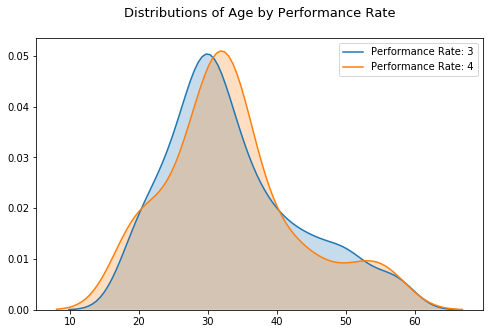

In [75]:
perfor_high = performance_data[performance_data['PerformanceRating']==3]['Age']
perfor_low = performance_data[performance_data['PerformanceRating']==4]['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=perfor_high, label="Performance Rate: 3", shade=True)
sns.kdeplot(data=perfor_low, label="Performance Rate: 4", shade=True)

plt.title("Distributions of Age by Performance Rate\n", size = 13)
plt.legend()
plt.show()

***Most of employees who left the job has low performance rate than others. But there is no concistency between ages and performance rates.***

###  Environment Satisfaction

In [76]:
df_young_rd = df_young[df_young['Department']=='Research & Development']
df_young_sale = df_young[df_young['Department']=='Sales']
df_young_hr = df_young[df_young['Department']=='Human Resources']

df_rest_rd = df_rest[df_rest['Department']=='Research & Development']
df_rest_sale = df_rest[df_rest['Department']=='Sales']
df_rest_hr = df_rest[df_rest['Department']=='Human Resources']

In [77]:
print('Young Employee Satisfactions:\n','--'*20)
print('Satisfactions of R&D Dept.:', df_young_rd.JobSatisfaction.mean())
print('Satisfactions of Sales Dept.:', df_young_sale.JobSatisfaction.mean())
print('Satisfactions of HR Dept.:', df_young_hr.JobSatisfaction.mean())
print('Rest of Company Satisfactions:\n','--'*20)
print('Satisfactions of R&D Dept.:', df_rest_rd.JobSatisfaction.mean())
print('Satisfactions of Sales Dept.:', df_rest_sale.JobSatisfaction.mean())
print('Satisfactions of HR Dept.:', df_rest_hr.JobSatisfaction.mean())

Young Employee Satisfactions:
 ----------------------------------------
Satisfactions of R&D Dept.: 2.6666666666666665
Satisfactions of Sales Dept.: 3.1
Satisfactions of HR Dept.: 2.0
Rest of Company Satisfactions:
 ----------------------------------------
Satisfactions of R&D Dept.: 2.7171500179018975
Satisfactions of Sales Dept.: 2.7737003058103977
Satisfactions of HR Dept.: 2.693548387096774


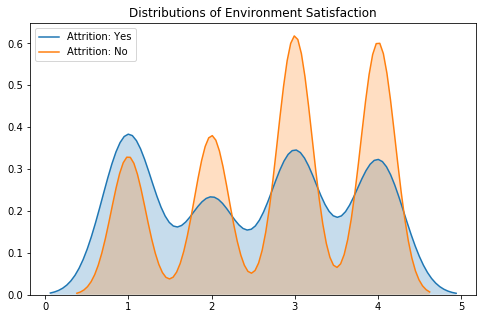

In [78]:
sat_yes = df[df['Attrition']=='Yes']['EnvironmentSatisfaction']
sat_no = df[df['Attrition']=='No']['EnvironmentSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.title("Distributions of Environment Satisfaction")
plt.legend()
plt.show()

In [79]:
sat_per = (sat_yes.value_counts()/sat_no.value_counts())*100

print('Resign Ratio by Environment Satisfaction:\n','--'*20, '\n', round(sat_per,2))

Resign Ratio by Environment Satisfaction:
 ---------------------------------------- 
 1.0    33.70
2.0    17.58
3.0    16.13
4.0    15.50
Name: EnvironmentSatisfaction, dtype: float64


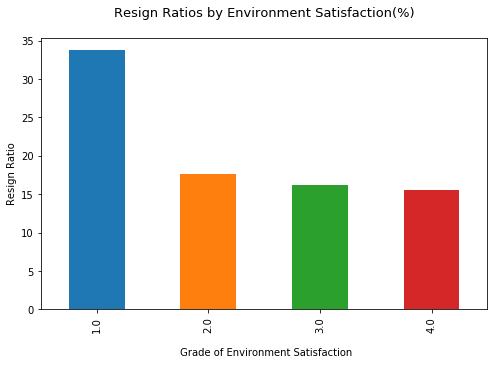

In [80]:
plt.figure(figsize = (8,5))
sat_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Environment Satisfaction')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Environment Satisfaction(%)\n', size = 13)
plt.show()

***Employees with low environment satisfaction has significantly higher resign ratio than others. Young employees seem happy to be in sales. Satisfactions are really bad at human resources. Research and development is doing okay, it is close to common situation at company, not bad.***

###  Work Life Balance

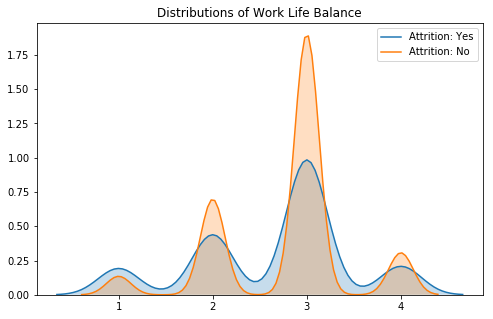

In [81]:
balance_yes = df[df['Attrition']=='Yes']['WorkLifeBalance']
balance_no = df[df['Attrition']=='No']['WorkLifeBalance']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.title("Distributions of Work Life Balance")
plt.legend()
plt.show()

In [82]:
balance_per = (balance_yes.value_counts()/balance_no.value_counts())*100

print('Resign Ratio by Work Life Balance:\n','--'*20, '\n', round(balance_per,2))

Resign Ratio by Work Life Balance:
 ---------------------------------------- 
 3.0    16.59
2.0    20.17
4.0    21.72
1.0    45.73
Name: WorkLifeBalance, dtype: float64


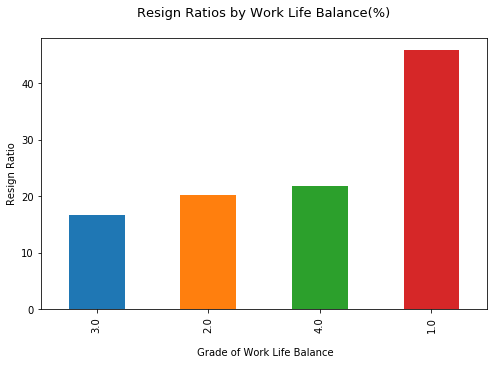

In [83]:
plt.figure(figsize = (8,5))
balance_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Work Life Balance')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Work Life Balance(%)\n', size = 13)
plt.show()

***Employees with the lowest work life balance has seriously high probability of resign, about 45 percent.***

### Initial Conclusions:

1. Job quits rate is 16 percent. 
2. Quits rate between genders is balanced. 
3. Age distributions between genders are balanced. 
4. Resign age distributions between genders are balanced. 
5. Majority of company travelling rarely. 
6. Resign ratio is seriously high at human resources than others. 
7. Resign ratio is not related to education degree primarily. 
8. Human resources field educated employees more likely to quit. 
9. Research directors have surprisingly high resign ratio. 
10. Singles are inclined to quit. 
11. Human resources getting low paid. 
12. Frequnetly job changing employees inclined to quit. 
13. There is no income inequality between genders at company. 
14. Employees with little experienced inclined to quit. 
15. Employees with low working years at company inclined to quit. 
16. Employees on first job are inclined to quit. 
17. Employees with low performance rate are inclined to quit. 
18. The best performance rate seen between 17-34 ages. 
19. Employees with low environmet and job satisfaction are inclined to quit. 
20. Employees with low work-life balance are inclined to quit. 

## 5. Building Classification Models

### 5.1 Getting Dummies

In [84]:
# useless column
df = df.drop('Education', axis = 1)

In [85]:
# get dummies
df.Attrition = pd.get_dummies(df.Attrition, drop_first = True)
df = pd.get_dummies(df)

In [86]:
df.head()

,Age,Attrition,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Education_str_Bachelor,Education_str_Below College,Education_str_College,Education_str_Doctor,Education_str_Master
0,51,0,6,1,131160,1.0,11,0,1.0,6,...,0,0,0,1,0,0,0,1,0,0
1,31,1,10,1,41890,0.0,23,1,6.0,3,...,0,0,0,0,1,0,1,0,0,0
2,32,0,17,4,193280,1.0,15,3,5.0,2,...,1,0,0,1,0,0,0,0,0,1
3,38,0,2,3,83210,3.0,11,3,13.0,5,...,0,0,0,1,0,0,0,0,1,0
4,32,0,10,1,23420,4.0,12,2,9.0,2,...,1,0,0,0,1,0,1,0,0,0


### 5. Building Models

### Is data balanced or imbalanced?

In [87]:
balance = (df.Attrition.value_counts()[1]/df.Attrition.shape[0])*100
print('Data Attrition Yes/No Percentage:\n','--'*20,'\n', balance,'%')

Data Attrition Yes/No Percentage:
 ---------------------------------------- 
 16.122448979591837 %


***Targer variable seems a bit imbalanced. We may have to fix it. Our model recall score should be higher than 0.16.***

### Train/Test Split

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis = 1) #feature matrix
y = df.Attrition # target vector

# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

### Logistic Regression with GridSearchCV

In [89]:
# creating logistic regression object
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)

# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 166.81005372000593


In [90]:
# calculate test score
from sklearn import metrics

model = model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

test_accuracy_log = metrics.accuracy_score(y_test, y_preds)
test_recall_log = metrics.recall_score(y_test, y_preds)
print('Test Accuracy:', test_accuracy_log)
print('Test Sensitivity:', test_recall_log)

Test Accuracy: 0.8424036281179138
Test Sensitivity: 0.1619718309859155


### K-Nearest Neighbors with Grid Search CV

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [92]:
# define a range for k values
k_range = list(range(1,31))

# create a parameter grid
param_grid = dict(n_neighbors=k_range)

knn=KNeighborsClassifier()
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# fit the grid with data
model = grid.fit(X,y)

# examine the best model
print('Best Estimator:', model.best_estimator_)
print('CV Score:', model.best_score_)

Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
CV Score: 1.0


In [93]:
model=model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# calculate test score
test_accuacy_knn = metrics.accuracy_score(y_test, y_preds)
test_recall_knn = metrics.recall_score(y_test, y_preds)


print('Test Accuracy:', test_accuacy_knn)
print('Test Sensitivity:', test_recall_knn)

Test Accuracy: 0.9897959183673469
Test Sensitivity: 0.9788732394366197


In [94]:
# view the results as a pandas DataFrame
stats_knn=pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

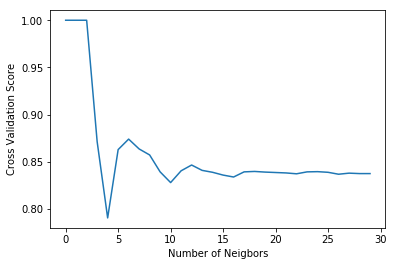

In [95]:
plt.plot(stats_knn.index, stats_knn.mean_test_score)
plt.xlabel('Number of Neigbors')
plt.ylabel('Cross Validation Score')
plt.show()

### Decision Tree with GridSearchCV

In [96]:
from sklearn.tree import DecisionTreeClassifier 

parameters={'min_samples_split' : range(10,500,50),'max_depth': range(1,16,2)}

clf_tree=DecisionTreeClassifier()

clf=GridSearchCV(clf_tree,parameters)

model = clf.fit(X,y)

In [97]:
# examine the best model
print('Best Estimator:', model.best_estimator_)
print('Best Score:', model.best_score_)

Best Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best Score: 0.9671201814058957


In [98]:
model=model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# calculate test score
test_accuracy_dt = metrics.accuracy_score(y_test, y_preds)
test_recall_dt = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_dt)
print('Test Sensitivity:', test_recall_dt)

Test Accuracy: 0.9229024943310657
Test Sensitivity: 0.852112676056338


### Random Forest with GridSearchCv

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [10, 20,50],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
model = grid.fit(X, y)

In [100]:
# examine the best model
print('Best Estimator:',model.best_estimator_)
print('Best Random Forest Score:',model.best_score_)

Best Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Random Forest Score: 1.0


In [101]:
model=model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# calculate test score
test_accuracy_rf = metrics.accuracy_score(y_test, y_preds)
test_recall_rf = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_rf)
print('Test Sensitivity:', test_recall_rf)

Test Accuracy: 0.9931972789115646
Test Sensitivity: 0.9577464788732394


### Extra Trees Classifier

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

scores=cross_val_score(clf, X, y, cv=10)
print('CV Score:',scores.mean())

CV Score: 1.0


In [103]:
model = clf.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# calculate test score

test_accuracy_et = metrics.accuracy_score(y_test, y_preds)
test_recall_et = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_et)
print('Test Sensitivity:', test_recall_et)

Test Accuracy: 0.9920634920634921
Test Sensitivity: 0.9507042253521126


### AdaBoost with Decision Trees

In [104]:
from sklearn.ensemble import AdaBoostClassifier

# create adaboost classifier with decision trees as base estimator
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)

scores = cross_val_score(clf, X, y, cv=5)

print('CV Score:',scores.mean())

CV Score: 0.9990927125522158


In [105]:
model = clf.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# calculate test score
test_accuracy_ada = metrics.accuracy_score(y_test, y_preds)
test_recall_ada = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_ada)
print('Test Sensitivity:', test_recall_ada)

Test Accuracy: 0.9875283446712018
Test Sensitivity: 0.971830985915493


### Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1)

scores = cross_val_score(clf, X, y, cv=10)

print('CV Score:',scores.mean())

CV Score: 0.9968274489282892


In [107]:
model = clf.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# calculate test score
test_accuracy_gb = metrics.accuracy_score(y_test, y_preds)
test_recall_gb = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_gb)
print('Test Sensitivity:', test_recall_gb)

Test Accuracy: 0.9965986394557823
Test Sensitivity: 0.9788732394366197


### Light GBM Classifier

In [108]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [109]:
lgb = LGBMClassifier(max_depth=7,
                        num_leaves=36,
                        learning_rate=0.4)

model = lgb.fit(X_train, y_train)

y_preds = model.predict(X_test)


model = lgb.fit(X_train, y_train)
y_preds=model.predict(X_test)

lgb_cv_score = cross_val_score(lgb, X,y,cv=5)
test_accuracy_lgb = metrics.accuracy_score(y_preds, y_test)
test_recall_lgb = metrics.recall_score(y_preds, y_test)

print('CV Score:', lgb_cv_score.mean())
print('Test Accuracy:', test_accuracy_lgb)
print('Test Sensitivity:', test_recall_lgb)

CV Score: 0.9993199846945195
Test Accuracy: 0.9920634920634921
Test Sensitivity: 1.0


### XGBoost

In [110]:
import xgboost as xgb
from xgboost import XGBClassifier  

In [111]:
xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=9, 
                      gamma=0.1)
model = xgb.fit(X_train, y_train)
y_preds=model.predict(X_test)

# xgb_cv_score = cross_val_score(xgb, X,y,cv=5)
test_accuracy_xgb = metrics.accuracy_score(y_preds, y_test)
test_recall_xgb = metrics.recall_score(y_preds, y_test)

# print('Cross Validation Score:', xgb_cv_score.mean())
print('Test Accuracy:', test_accuracy_xgb)
print('Test Sensitivity:', test_recall_xgb)

Test Accuracy: 0.9920634920634921
Test Sensitivity: 1.0


### Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [112]:
feature_importances = model.feature_importances_
feature_names = X.columns

features = pd.DataFrame({'Feature':feature_names,
                        'Importance':feature_importances})

features = features.sort_values('Importance', ascending=False).reset_index().drop('index',axis=1)
feature_list = features.Feature.values

### The Most Important Features

In [113]:
print(features.head(10))

                            Feature  Importance
0              MaritalStatus_Single    0.042625
1  BusinessTravel_Travel_Frequently    0.038541
2    EducationField_Human Resources    0.034740
3           JobRole_Human Resources    0.030807
4        Department_Human Resources    0.030286
5      JobRole_Sales Representative    0.029774
6                 TotalWorkingYears    0.028959
7                               Age    0.028733
8            MaritalStatus_Divorced    0.027167
9                NumCompaniesWorked    0.025649


In [114]:
results = pd.DataFrame({'Models': ['Logistic Regression',
                                   'KNN',
                                   'Decision Tree',
                                   'Random Forest',
                                   'Extra Trees',
                                   'AdaBoost',
                                   'Gradient Boosting',
                                   'LightGBM',
                                   'XGBoost'], 
                       'Accuracy':[test_accuracy_log,
                                  test_accuacy_knn,
                                  test_accuracy_dt,
                                  test_accuracy_rf,
                                  test_accuracy_et,
                                  test_accuracy_ada,
                                  test_accuracy_gb,
                                  test_accuracy_lgb,
                                  test_accuracy_xgb], 
                       'Sensitivity':[test_recall_log,
                                     test_recall_knn,
                                     test_recall_dt,
                                     test_recall_rf,
                                     test_recall_et,
                                     test_recall_ada, 
                                     test_recall_gb,
                                     test_recall_lgb,
                                     test_recall_xgb]})

In [115]:
print(results)

                Models  Accuracy  Sensitivity
0  Logistic Regression  0.842404     0.161972
1                  KNN  0.989796     0.978873
2        Decision Tree  0.922902     0.852113
3        Random Forest  0.993197     0.957746
4          Extra Trees  0.992063     0.950704
5             AdaBoost  0.987528     0.971831
6    Gradient Boosting  0.996599     0.978873
7             LightGBM  0.992063     1.000000
8              XGBoost  0.992063     1.000000


### XGBoost with Adding Important Features Stepwise

I set a new model with less number of variables to test how much accuracy and sensitivity that will be gained by adding features one by one according to their importance ranking.

In [116]:
recall = []
accuracy = []
for i in range(1, len(feature_list)):
    # split
    X_train, X_test, y_train, y_test =  train_test_split(scaler.fit_transform(X[feature_list[0:i]]) , y, 
                                                         test_size=0.20, random_state=111, stratify = y)
    xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=9, 
                      gamma=0.1)
    model = xgb.fit(X_train, y_train)
    y_preds=model.predict(X_test)

    test_accuracy = metrics.accuracy_score(y_preds, y_test)
    test_recall = metrics.recall_score(y_preds, y_test)
    
    recall.append(test_recall)
    accuracy.append(test_accuracy)

In [117]:
data=pd.DataFrame({'Recall':recall,
                  'Accuracy':accuracy,
                  'Nums':range(1,len(feature_list))})

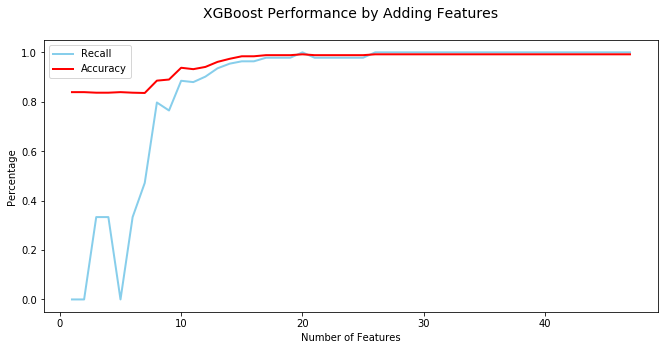

In [118]:
# multiple line plot
plt.figure(figsize=(11,5))
plt.title('XGBoost Performance by Adding Features\n', size=14)
plt.xlabel('Number of Features')
plt.ylabel('Percentage')
plt.plot( 'Nums', 'Recall', data=data, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Nums', 'Accuracy', data=data, marker='', markerfacecolor='blue', markersize=12, color='red', linewidth=2)
plt.legend()
plt.show()

### 6. Results

At the first part of project, we have made a cleaning without too much effort. The we have put our target variable into center and made an exploration of data around of it. That exploration is actually not necessary for this project, but it is fine to get an intuition about data. 

In that part, we have had some conlusions about features. In Initial Conclusions section, we have expressed our conclusions clearly. After building models, we have seen that many of conclusions are covering our feature importance results which are obtained from XGBoost algorithm. 

* Age
* Marital status
* Travel frequency
* Human resources
* Working years, experience, or with current manager etc.
* Satisfaction(job, environment)
* Research directors situation

In the building models part, we have worked on 9 algorithms also including ensemble methods, logistic regression, K-nearest neighbors, decision tree, random forest, extra trees, adaboost, gradient boosting, Lightgbm and XGboost. In this process, we have used GridSearchCV to tune parameters for many algorithms or used cross validation and manuel parameter tuning for some. Then all models have been tested on a new train and test set and performances measured to assure no overfitting. 

For model accuracies and sensitivities, we can say, they mostly worked very well. Numbers are given above. At the end of the project, we have actually studied simple optimization. We have measured performance increase of XGBoost model while adding one more feature and get a new model performance with each adding. We have seen here, if we use only half of features we would get the same result. That means, it can take shorter time than complete model.